In [1]:
def forward_prop(X,Y,W1,b1,W2,b2,reg):
    m=Y.shape[0]
    Z = X.dot(W1) + b1
    A = 1./(1 + np.exp(-Z)) #sigmoid activation
    y_hat = A.dot(W2) + b2
    mse =1/m* np.sum(np.square((Y - y_hat)))
    Loss=mse+ reg*(np.sum(W1**2)+np.sum(W2**2))
    cache={"y_hat":y_hat,"Z":Z,"A":A}
    return Loss,cache

In [2]:
def back_prop(X,Y,W1,W2,b1,b2,cache,reg):
    m=Y.shape[0]
    y_hat=cache["y_hat"]
    A=cache["A"]
    Z=cache["Z"]
    dy_hat = (y_hat-Y)
    dW2 = 1.0/m*(A.T.dot(dy_hat) + reg*W2)
    db2 = 1.0/m*dy_hat.sum(axis=0)
    dA = dy_hat.dot(W2.T)
    dZ = A*(1-A)*dA
    dW1 = 1.0/m*(X.T.dot(dZ) + reg*W1)
    db1 = 1.0/m*dZ.sum(axis=0)
    gradients={"dW2":dW2,"db2":db2,"dW1":dW1,"db1":db1}
    return gradients

In [3]:
def accuracy(y_hat,y):
    y_hat = np.argmax(y_hat,axis=1)
    y= np.argmax(y,axis=1)
    accuracy=np.sum(y_hat==y)/y.size 
    return accuracy

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:' , x_train.shape)
H=200#no of hidden layers
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train,x_test=x_train/255.0,x_test/255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))#shaping images into a vector Din=32x32x3
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

####################################
x_train,x_test =x_train*255,x_test*255#By increasing intensity of the input to increase the gradients
######################################
std=1e-5
#np.random.seed(1)
W1 = std*np.random.randn(Din, H)#W1 initialization
b1 = np.zeros(H)#b1 initialization
W2 = std*np.random.randn(H, K)#W2 initialization
b2 = np.zeros(K)#b2 initialization
print("W1:", W1.shape)
print("b1:", b1.shape)
print("W2:", W2.shape)
print("b2:", b2.shape)
batch_size = Ntr #for the batch size whole dataset is considered

iterations =300
lr =0.015
init_lr=lr
lr_decay=0.999#learning rate is decreased in each iteration
reg =2e-6#regularization term which stops growth of weights
train_loss_history = []
test_loss_history=[]
train_acc_history = []
test_acc_history = []

seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)#generating image indices
    rng.shuffle(indices)
    x_train=x_train[indices]
    y_train=y_train[indices]
    
    # Forward pass
    
    loss,cache=forward_prop(W1=W1,b1=b1,W2=W2,b2=b2,X=x_train,Y=y_train,reg=reg)
   
    train_acc=accuracy(cache["y_hat"],y_train)
    train_acc_history.append(train_acc)
    train_loss_history.append(loss)

    test_loss,test_cache=forward_prop(X=x_test,Y=y_test,W1=W1,b1=b1,W2=W2,b2=b2,reg=reg)
   
    test_acc=accuracy(test_cache["y_hat"],y_test)
    test_acc_history.append(test_acc)
    test_loss_history.append(test_loss)

    if t%10==0:
      print("Epoch "+str(t+1)+"/"+str(iterations)+">>> trainig_loss: ",loss,">>training_accuracy: ",train_acc,">>testing_loss:",test_loss,">>>testing_accuracy:",test_acc)

    # Backward pass
    gradients=back_prop(X=x_train,Y=y_train,W1=W1,W2=W2,b1=b1,b2=b2,cache=cache,reg=reg)
    dW1=gradients["dW1"]
    db1=gradients["db1"]
    dW2=gradients["dW2"]
    db2=gradients["db2"]

    W1-=lr*dW1
    b1-=lr*b1
    W2-=lr*dW2
    b2-=lr*db2
    lr*=lr_decay



170500096/170498071 [==============================] - 3s 0us/step
x_train: (50000, 32, 32, 3)
W1: (3072, 200)
b1: (200,)
W2: (200, 10)
b2: (10,)
Epoch 1/300>>> trainig_loss:  1.000024141408263 >>training_accuracy:  0.1 >>testing_loss: 1.0000241362108686 >>>testing_accuracy: 0.1
Epoch 11/300>>> trainig_loss:  0.8794213783912251 >>training_accuracy:  0.16164 >>testing_loss: 0.8790858580979563 >>>testing_accuracy: 0.1628
Epoch 21/300>>> trainig_loss:  0.8496512539491273 >>training_accuracy:  0.2505 >>testing_loss: 0.8493668410164825 >>>testing_accuracy: 0.2493
Epoch 31/300>>> trainig_loss:  0.8363978034474681 >>training_accuracy:  0.28576 >>testing_loss: 0.8361725315842357 >>>testing_accuracy: 0.2846
Epoch 41/300>>> trainig_loss:  0.8305441313258662 >>training_accuracy:  0.3034 >>testing_loss: 0.8304644302065187 >>>testing_accuracy: 0.3036
Epoch 51/300>>> trainig_loss:  0.8226847322683712 >>training_accuracy:  0.327 >>testing_loss: 0.8229312503546544 >>>testing_accuracy: 0.3268
Epoch 61/

lr_decay 0.999
init_lr 0.015
std 1e-05
reg 2e-06


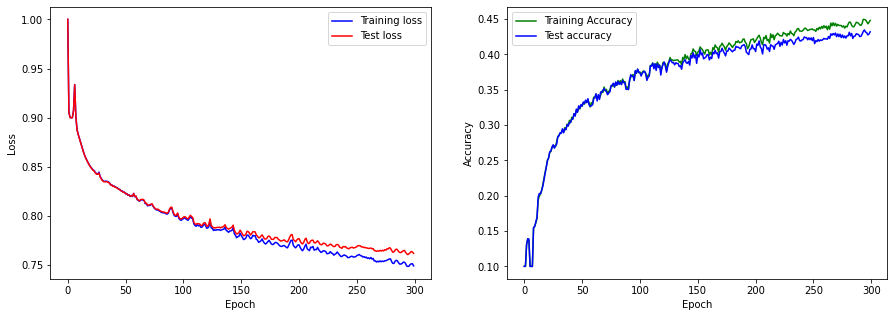

In [5]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
#print("Scaling is removed")
print("lr_decay",lr_decay)
print("init_lr",init_lr)
print("std",std)
print("reg",reg)
ax[0].plot(train_loss_history,'b')
ax[0].plot(test_loss_history,'r')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')  
ax[0].legend(['Training loss','Test loss'])

ax[1].plot(train_acc_history,'g')
ax[1].plot(test_acc_history,'b')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')  
ax[1].legend(['Training Accuracy','Test accuracy'])


In [19]:
std=1e-5
#np.random.seed(1)
W1 = std*np.random.randn(Din, H)#W1 initialization
b1 = np.zeros(H)#b1 initialization
W2 = std*np.random.randn(H, K)#W2 initialization
b2 = np.zeros(K)#b2 initialization
print("W1:", W1.shape)
print("b1:", b1.shape)
print("W2:", W2.shape)
print("b2:", b2.shape)
batch_size = 500 #for the batch size 500 is considered

iterations =300
lr =0.015
init_lr=lr
lr_decay=0.999#learning rate is decreased in each iteration
reg =2e-6#regularization term which stops growth of weights
St_train_loss_history = []
St_test_loss_history=[]
St_train_acc_history = []
St_test_acc_history = []

seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.random.choice(Ntr,batch_size)#generating image indices of 500 out of the whole training examples
    rng.shuffle(indices)
    x_train_mini=x_train[indices]
    y_train_mini=y_train[indices]
    
    # Forward pass
    
    loss,cache=forward_prop(W1=W1,b1=b1,W2=W2,b2=b2,X=x_train_mini,Y=y_train_mini,reg=reg)
   
    train_acc=accuracy(cache["y_hat"],y_train_mini)
    St_train_acc_history.append(train_acc)
    St_train_loss_history.append(loss)

    test_loss,test_cache=forward_prop(X=x_test,Y=y_test,W1=W1,b1=b1,W2=W2,b2=b2,reg=reg)
   
    test_acc=accuracy(test_cache["y_hat"],y_test)
    St_test_acc_history.append(test_acc)
    St_test_loss_history.append(test_loss)

    if t%10==0:
      print("Epoch "+str(t+1)+"/"+str(iterations)+">>> trainig_loss: ",loss,">>training_accuracy: ",train_acc,">>testing_loss:",test_loss,">>>testing_accuracy:",test_acc)

    # Backward pass
    gradients=back_prop(X=x_train_mini,Y=y_train_mini,W1=W1,W2=W2,b1=b1,b2=b2,cache=cache,reg=reg)
    dW1=gradients["dW1"]
    db1=gradients["db1"]
    dW2=gradients["dW2"]
    db2=gradients["db2"]

    W1-=lr*dW1
    b1-=lr*b1
    W2-=lr*dW2
    b2-=lr*db2
    lr*=lr_decay


W1: (3072, 200)
b1: (200,)
W2: (200, 10)
b2: (10,)
Epoch 1/300>>> trainig_loss:  0.9999904940624159 >>training_accuracy:  0.088 >>testing_loss: 0.999985662491667 >>>testing_accuracy: 0.1
Epoch 11/300>>> trainig_loss:  0.8781006554984571 >>training_accuracy:  0.176 >>testing_loss: 0.878671457081084 >>>testing_accuracy: 0.1616
Epoch 21/300>>> trainig_loss:  0.848198444744895 >>training_accuracy:  0.262 >>testing_loss: 0.853440588192908 >>>testing_accuracy: 0.2371
Epoch 31/300>>> trainig_loss:  0.8399524260830329 >>training_accuracy:  0.254 >>testing_loss: 0.8401385252085443 >>>testing_accuracy: 0.265
Epoch 41/300>>> trainig_loss:  0.8425669832303905 >>training_accuracy:  0.274 >>testing_loss: 0.8295903382990999 >>>testing_accuracy: 0.303
Epoch 51/300>>> trainig_loss:  0.8340434165047518 >>training_accuracy:  0.294 >>testing_loss: 0.8383627369672283 >>>testing_accuracy: 0.2871
Epoch 61/300>>> trainig_loss:  0.8311732851113172 >>training_accuracy:  0.306 >>testing_loss: 0.8247520454423896 

lr_decay 0.999
init_lr 0.015
std 1e-05
reg 2e-06


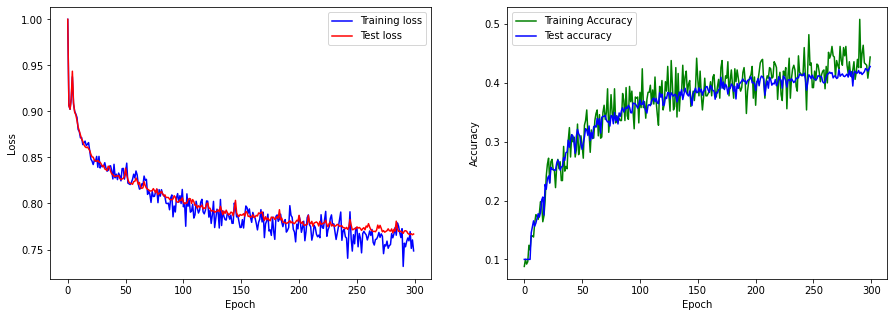

In [20]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

print("lr_decay",lr_decay)
print("init_lr",init_lr)
print("std",std)
print("reg",reg)
ax[0].plot(St_train_loss_history,'b')
ax[0].plot(St_test_loss_history,'r')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')  
ax[0].legend(['Training loss','Test loss'])

ax[1].plot(St_train_acc_history,'g')
ax[1].plot(St_test_acc_history,'b')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')  
ax[1].legend(['Training Accuracy','Test accuracy'])


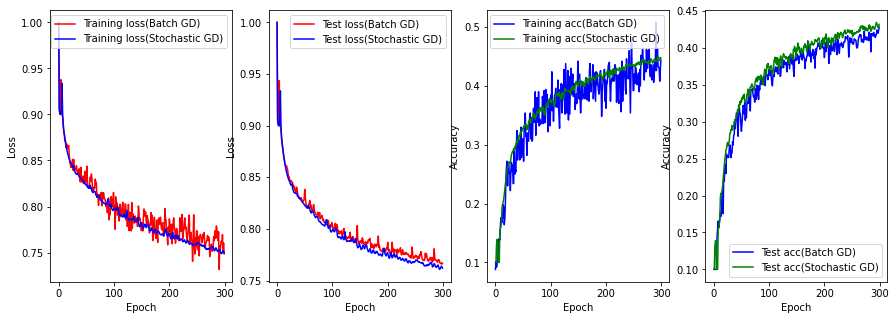

In [22]:
fig,ax = plt.subplots(1,4,figsize=(15,5))

ax[0].plot(St_train_loss_history,'r')
ax[0].plot(train_loss_history,'b')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')  
ax[0].legend(['Training loss(Batch GD)','Training loss(Stochastic GD)'])

ax[1].plot(St_test_loss_history,'r')
ax[1].plot(test_loss_history,'b')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')  
ax[1].legend(['Test loss(Batch GD)','Test loss(Stochastic GD)'])

ax[2].plot(St_train_acc_history,'b')
ax[2].plot(train_acc_history,'g')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Accuracy')  
ax[2].legend(['Training acc(Batch GD)','Training acc(Stochastic GD)'])

ax[3].plot(St_test_acc_history,'b')
ax[3].plot(test_acc_history,'g')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Accuracy')  
ax[3].legend(['Test acc(Batch GD)','Test acc(Stochastic GD)'])

